Поля в датасетах


*  image_path - строка, являющаюся путем до изображения в случае обучения или названием изображения в случае теста 
*   emotion - строка, характеризующая эмоцию

В данном задании требуется предсказать 9 базовых эмоций, таких как:


*   neutral - нейтральная эмоция
*   anger - гнев, злость
*   contempt - презрение
*   disgust - отвращение
*   fear - страх
*   happy - веселый
*   sad - грусть
*   surprise - удивленность
*   uncertain - неуверенность


#0.Загрузка недостающих библиотек

In [1]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 2.9 MB/s 


In [2]:
!pip install keras_vggface

In [3]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-25ivb9oz
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-25ivb9oz


In [4]:
!pip install gdown

#1.Импорт необходимых библиотек и загрузка файлов


In [6]:
#Импорт библиотек
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from matplotlib import pyplot as plt
from PIL import Image
import os 
import urllib.request
import zipfile #Открыть архивы с данными
import shutil # для перемещения и копирования файла
import gdown
from tensorflow.keras.preprocessing import image #Загрузка фото
import requests

In [7]:
#Функция возвращает название файла загружаемого по ссылке
def get_filename(link):
  return link.split('/')[-1]
#Функция скачивает файл
def download_file(link):
  req = requests.get(link, allow_redirects=True)
  open(get_filename(link), 'wb').write(req.content)

In [8]:
#Константы
#Путь к тренироваочному датасету
PATH_TRAIN_CSV = 'https://raw.githubusercontent.com/poskryobik/Definition_of_emotions/main/train.csv'
#Путь к тестовому датасету
PATH_SAMPLE_SUBMISSION = 'https://raw.githubusercontent.com/poskryobik/Definition_of_emotions/main/sample_submission.csv'
#Путь к файлу конфигурации для класса keras_vggface
PATH_CONFIG_FILE = 'https://raw.githubusercontent.com/poskryobik/Definition_of_emotions/main/models.py'
#Путь к скаченной модели resnet50
PATH_MODEL_RESNET_50 = 'https://drive.google.com/uc?export=download&id=1g3ztp1iVuCKofU4sGsc3t5mF8c1sQsag'
#Путь к фото для обучения и тестирования модели
PATH_TRAIN_DATA = 'https://drive.google.com/uc?export=download&id=1xaplHpSvZHG-qZcaq56K__otcUm9TXUz'
PATH_TEST_DATA = 'https://drive.google.com/uc?export=download&id=1QdhIxh1QUEuLgRb7DWa7RA7CA08ybNRJ'

In [19]:
#Скачивание нужных файлов
download_file(PATH_TRAIN_CSV)
download_file(PATH_SAMPLE_SUBMISSION)
download_file(PATH_CONFIG_FILE)

In [ ]:
#Загрузка тренировочных данных
gdown.download(PATH_TRAIN_DATA,'train.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1xaplHpSvZHG-qZcaq56K__otcUm9TXUz
To: C:\Users\Noname\Downloads\train.zip
100%|██████████| 2.27G/2.27G [00:37<00:00, 60.4MB/s]


'train.zip'

In [ ]:
#Загрузка тестовых данных
gdown.download(PATH_TEST_DATA,'test_kaggle.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1QdhIxh1QUEuLgRb7DWa7RA7CA08ybNRJ
To: C:\Users\Noname\Downloads\test_kaggle.zip

  0%|          | 0.00/2.27G [00:00<?, ?B/s]
  0%|          | 524k/2.27G [00:00<35:10, 1.08MB/s]
  0%|          | 3.15M/2.27G [00:00<05:37, 6.72MB/s]
  0%|          | 7.34M/2.27G [00:01<05:02, 7.50MB/s]
  0%|          | 8.91M/2.27G [00:01<05:26, 6.95MB/s]
  1%|          | 15.2M/2.27G [00:01<02:32, 14.8MB/s]
  1%|          | 23.6M/2.27G [00:01<01:26, 26.0MB/s]
  1%|▏         | 32.0M/2.27G [00:01<01:00, 36.8MB/s]
  2%|▏         | 40.4M/2.27G [00:01<00:48, 46.1MB/s]
  2%|▏         | 48.8M/2.27G [00:01<00:41, 54.3MB/s]
  2%|▏         | 56.6M/2.27G [00:02<00:37, 59.7MB/s]
  3%|▎         | 65.0M/2.27G [00:02<00:33, 65.3MB/s]
  3%|▎         | 72.9M/2.27G [00:02<00:32, 68.8MB/s]
  4%|▎         | 81.3M/2.27G [00:02<00:30, 72.0MB/s]
  4%|▍         | 89.1M/2.27G [00:02<00:30, 72.1MB/s]
  4%|▍         | 97.5M/2.27G [00:02<00:29, 74.6MB/s]
  5%|▍       

 45%|████▍     | 1.01G/2.27G [00:17<00:22, 55.9MB/s]
 45%|████▍     | 1.02G/2.27G [00:17<00:22, 54.7MB/s]
 45%|████▌     | 1.02G/2.27G [00:17<00:22, 55.1MB/s]
 45%|████▌     | 1.03G/2.27G [00:17<00:23, 52.4MB/s]
 46%|████▌     | 1.04G/2.27G [00:17<00:22, 55.4MB/s]
 46%|████▌     | 1.04G/2.27G [00:17<00:22, 54.8MB/s]
 46%|████▌     | 1.05G/2.27G [00:18<00:22, 55.0MB/s]
 46%|████▋     | 1.05G/2.27G [00:18<00:23, 52.3MB/s]
 47%|████▋     | 1.06G/2.27G [00:18<00:22, 55.2MB/s]
 47%|████▋     | 1.07G/2.27G [00:18<00:21, 56.7MB/s]
 47%|████▋     | 1.07G/2.27G [00:18<00:21, 55.1MB/s]
 47%|████▋     | 1.08G/2.27G [00:18<00:19, 61.5MB/s]
 48%|████▊     | 1.09G/2.27G [00:18<00:18, 65.7MB/s]
 48%|████▊     | 1.10G/2.27G [00:18<00:17, 69.3MB/s]
 49%|████▊     | 1.10G/2.27G [00:18<00:16, 72.7MB/s]
 49%|████▉     | 1.11G/2.27G [00:19<00:17, 68.1MB/s]
 49%|████▉     | 1.12G/2.27G [00:19<00:19, 59.6MB/s]
 50%|████▉     | 1.13G/2.27G [00:19<00:18, 61.8MB/s]
 50%|████▉     | 1.13G/2.27G [00:19<00:20, 55.

 87%|████████▋ | 1.97G/2.27G [00:34<00:06, 49.9MB/s]
 87%|████████▋ | 1.98G/2.27G [00:34<00:05, 51.3MB/s]
 87%|████████▋ | 1.99G/2.27G [00:34<00:05, 54.1MB/s]
 88%|████████▊ | 1.99G/2.27G [00:34<00:04, 58.0MB/s]
 88%|████████▊ | 2.00G/2.27G [00:34<00:04, 63.0MB/s]
 88%|████████▊ | 2.01G/2.27G [00:34<00:03, 67.3MB/s]
 89%|████████▊ | 2.02G/2.27G [00:34<00:03, 66.8MB/s]
 89%|████████▉ | 2.02G/2.27G [00:34<00:03, 69.0MB/s]
 89%|████████▉ | 2.03G/2.27G [00:35<00:03, 72.2MB/s]
 90%|████████▉ | 2.04G/2.27G [00:35<00:03, 65.1MB/s]
 90%|████████▉ | 2.05G/2.27G [00:35<00:03, 64.2MB/s]
 90%|█████████ | 2.05G/2.27G [00:35<00:03, 66.6MB/s]
 91%|█████████ | 2.06G/2.27G [00:35<00:03, 70.4MB/s]
 91%|█████████ | 2.07G/2.27G [00:35<00:02, 69.3MB/s]
 91%|█████████▏| 2.08G/2.27G [00:35<00:02, 67.2MB/s]
 92%|█████████▏| 2.08G/2.27G [00:35<00:02, 68.2MB/s]
 92%|█████████▏| 2.09G/2.27G [00:35<00:02, 68.6MB/s]
 92%|█████████▏| 2.10G/2.27G [00:36<00:02, 72.3MB/s]
 93%|█████████▎| 2.11G/2.27G [00:36<00:02, 70.

'test_kaggle.zip'

In [ ]:
#Скачиваем модель resnet50
gdown.download(url = 'https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO', output = 'resnet50face.h5')

Downloading...
From: https://drive.google.com/uc?id=1oHJxVZCcVwp1dgcwDIZL4h97uInxOGWO
To: C:\Users\Noname\Downloads\resnet50face.h5

  0%|          | 0.00/166M [00:00<?, ?B/s]
  0%|          | 524k/166M [00:00<02:21, 1.17MB/s]
  2%|▏         | 3.67M/166M [00:00<00:19, 8.36MB/s]
  6%|▌         | 9.96M/166M [00:00<00:07, 22.0MB/s]
 10%|█         | 17.3M/166M [00:01<00:08, 17.1MB/s]
 13%|█▎        | 21.0M/166M [00:01<00:07, 19.9MB/s]
 16%|█▌        | 25.7M/166M [00:01<00:05, 24.7MB/s]
 20%|█▉        | 33.0M/166M [00:01<00:03, 34.1MB/s]
 24%|██▍       | 39.8M/166M [00:01<00:03, 41.4MB/s]
 28%|██▊       | 46.7M/166M [00:01<00:02, 47.2MB/s]
 32%|███▏      | 52.4M/166M [00:01<00:02, 39.6MB/s]
 40%|███▉      | 65.5M/166M [00:01<00:01, 59.6MB/s]
 44%|████▍     | 72.9M/166M [00:02<00:01, 51.6MB/s]
 53%|█████▎    | 87.0M/166M [00:02<00:01, 70.9MB/s]
 58%|█████▊    | 95.9M/166M [00:02<00:00, 70.7MB/s]
 63%|██████▎   | 104M/166M [00:02<00:00, 71.0MB/s] 
 68%|██████▊   | 112M/166M [00:02<00:00, 72.9

'resnet50face.h5'

<h1>Препроцессинг</h1>

In [10]:
#Загрузка датафреймов
train_df = pd.read_csv('/content/train.csv', index_col=0)
sample_submission = pd.read_csv('/content/sample_submission.csv', index_col= 0)

In [11]:
#Кодирование классов
le = preprocessing.LabelEncoder()
le.fit(train_df['emotion'].unique())
train_df['class'] = le.transform(train_df['emotion'])
train_df

,image_path,emotion,class
0,./train/anger/0.jpg,anger,0
1,./train/anger/1.jpg,anger,0
2,./train/anger/10.jpg,anger,0
3,./train/anger/100.jpg,anger,0
4,./train/anger/1000.jpg,anger,0
...,...,...,...
50041,./train/uncertain/995.jpg,uncertain,8
50042,./train/uncertain/996.jpg,uncertain,8
50043,./train/uncertain/997.jpg,uncertain,8
50044,./train/uncertain/998.jpg,uncertain,8


In [12]:
#Cписок классов
le.classes_

array(['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise', 'uncertain'], dtype=object)

In [14]:
#Разархивирование файлов  	
train_zip = zipfile.ZipFile('/content/train.zip')
train_zip.extractall('/content')
train_zip.close()
test_zip = zipfile.ZipFile('/content/test_kaggle.zip')
test_zip.extractall('/content')
test_zip.close()

In [15]:
#Функция вывода изображеняи и декодинга номера класса
def decode_labels(class_nm):
    return le.classes_[class_nm]
def show_face(image, class_nm):
    plt.imshow(image)
    emotion = decode_labels(class_nm)
    plt.title(f"Emotion: {emotion}")

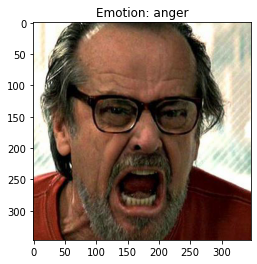

In [16]:
#Тестовый выовод
img = Image.open(train_df['image_path'][100:101].values[0])
show_face(image=img, class_nm = train_df['class'][100:101].values[0])

In [22]:
#Заменяем файл
os.remove('/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py')
shutil.copyfile('/content/models.py', r'/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py')

'/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py'

In [23]:
#Предобработка
from keras_vggface import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_input_facenet(image_):
    """
    image_ -- тензор размера (1, H, W, 3)
    return: картинка, с примененным preprocess_input(..., version=2) из keras_vggface
    """
    preprocessed = utils.preprocess_input(img, version=2) 
    return preprocessed



#Создание генератора c аугментацией

In [24]:
BATCH_SIZE = 128
IMAGE_SIZE = 224
#Аугментация
image_gen = ImageDataGenerator(preprocess_input_facenet, 
                               #brightness_range = (0,2), #Добавление яркости
                               #featurewise_std_normalization=True,
                               rotation_range= 25, #Повороты
                               #width_shift_range=0.1,
                               #height_shift_range=0.1,
                               horizontal_flip=True,
                               validation_split=0.2,
                               shear_range = 2)  

train_generator =  image_gen.flow_from_dataframe(dataframe= train_df, 
                                                 x_col= "image_path", 
                                                 y_col= 'emotion' ,
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                                 batch_size=BATCH_SIZE, 
                                                 shuffle=True,
                                                 color_mode='rgb', 
                                                 class_mode="sparse",
                                                 save_format="png")
# image_gen_test = ImageDataGenerator(preprocess_input_facenet)  
# test_generator = image_gen_test.flow_from_dataframe(dataframe= test_df, 
#                                                  x_col= "image_path", 
#                                                  y_col= 'emotion' ,
#                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE), 
#                                                  batch_size=BATCH_SIZE, 
#                                                  shuffle=True,
#                                                  color_mode='rgb', 
#                                                  class_mode="sparse",
#                                                  save_format="png")


Found 50046 validated image filenames belonging to 9 classes.


In [25]:
#Тесты
sample_images, sample_labels = next(train_generator)
assert sample_images.shape == (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3), "Неправильный размер батча"
assert sample_labels.shape == (BATCH_SIZE, ), "Неправильный размер меток класса"
print(sample_labels.shape)
print("Simple tests passed")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(128,)
Simple tests passed


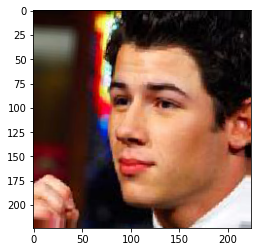

In [26]:
#Депроцессинг изображения
def deprocess_image(vggface_image):
    """
    return: корректно отображаеая картинка типа np.uint8(!!). 
    """
    image = np.copy(vggface_image)
    image[..., 2] += 131.0912
    image[..., 1] += 103.8827
    image[..., 0] += 91.4953
    image = image[..., ::-1].astype(np.uint8)
    return image

# теперь картинка должна отображаться корректно
plt.imshow(deprocess_image(utils.preprocess_input(sample_images[1], version=2)))

<h2>Finetuning </h2>

In [ ]:
# #Копирую модель resnet50
# shutil.copyfile(r'/content/drive/MyDrive/diplom_2/resnet50/resnet50face.h5', 
#                 r'/content/resnet50face.h5')

'/content/resnet50face.h5'

In [ ]:
#Загружаем модель
vggface_model = load_model(/content/resnet50face.h5)

In [ ]:
# Отсекаем ненужные слои и замараживаем веса 
base_model =  tf.keras.Model([vggface_model.input], vggface_model.get_layer('avg_pool').output)
base_model.trainable = False
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [ ]:
#Добавляем сверточные слои
from keras.backend import flatten
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(256, (3, 3), dilation_rate=6, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(256, (1, 1), dilation_rate=6, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(256, (3, 3), dilation_rate=6, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(256, (1, 1), dilation_rate=6, padding='same', activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=256, activation= tf.keras.activations.relu),
  tf.keras.layers.Dense(units=9, activation= tf.keras.activations.softmax)
])

#Проверка скорости на inference

In [ ]:
%%timeit -n 10 -r 10
q = model(np.zeros((1, 224, 224, 3), dtype=np.float32))

The slowest run took 11.62 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 10: 73.6 ms per loop


Скорость удовлетворяет указанным в ТЗ требованиям

#Обучение модели

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003), 
              loss = tf.keras.losses.sparse_categorical_crossentropy, 
              metrics = ['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/diplom_2/model_1/checkpoint_best_1.h5",
                                                monitor = 'accuracy', 
                                                save_best_only=True)

In [ ]:
EPOCHS = 1

model.fit_generator(train_generator, 
                    # validation_data= test_generator, 
                    #steps_per_epoch= 25,  
                    callbacks= checkpoint, 
                    epochs = EPOCHS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


391/391 [==============================] - 1152s 3s/step - loss: 1.7129 - accuracy: 0.3753


#Определение эмоций изображений в датасете sample_submission

In [ ]:
for i, im_path in enumerate(sample_submission.index):
  try:
    img = image.load_img('./test_kaggle/'+im_path, target_size=(224, 224))
    img = np.array([np.array(img)])
    answer = model.predict(img)
    res_class = list(answer[0]).index(answer[0].max()) 
    sample_submission['emotion'][im_path] = le.classes_[res_class]
  except FileNotFoundError:
    continue 

In [ ]:
#Сохраняем результат
sample_submission.to_csv('sample_submission.csv')

Результат на leadbord, который удовлетворяет условию задачи:
1.   Score: 0.43520
2.   Private score: 0.42200 <br>

